In [1]:
#will actually need this
#!pip install librosa

In [12]:
#!pip install sensormotion

  Created wheel for sensormotion: filename=sensormotion-1.1.4-py3-none-any.whl size=19679 sha256=66aa6ae83ed19187fee9326ab5932f6ec494e0f1ab1fa423ad05243d7a248e12
  Stored in directory: c:\users\peter\appdata\local\pip\cache\wheels\75\d2\43\d129af476d6d0717bcdfc3b7d6ff9b15d65cccdfa21518adac
Successfully built sensormotion


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy
import matplotlib.pyplot as plt
import librosa
import sensormotion as sm
#from pyAudioAnalysis import audioBasicIO #don't really need pyaudioanalysis
#from pyAudioAnalysis import ShortTermFeatures

C:\Users\peter\Anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\peter\Anaconda3\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


covariance:

6 combinations:
X X
X Y
X Z
Y Y
Z Z
Y Z

#### Run all below until next markdown

In [2]:
#must run join_together notebook to generate joined.pkl
df = pd.read_pickle('joined.pkl')
ids = df.pid.unique()

In [10]:
#df.describe()

,x,y,z,TAC_Reading
count,1.405756e+07,1.405756e+07,1.405756e+07,1.405756e+07
mean,-9.269850e-03,-7.168399e+06,7.168399e+06,5.006608e-02
std,9.540697e-01,3.528998e+07,3.528998e+07,5.404536e-02
min,-4.333507e+01,-1.809008e+08,-4.902300e+01,-2.127451e-02
25%,-5.700000e-03,-4.500000e-03,-4.200000e-03,6.193067e-03
50%,-2.000000e-04,-2.000000e-04,6.100000e-03,3.851604e-02
75%,7.600000e-03,4.500000e-03,4.605913e-02,7.851257e-02
max,3.922540e+01,2.731123e+01,1.809008e+08,2.447153e-01


In [11]:
df = df[(df['x'] > -60) & (df['x'] < 60)]
df = df[(df['y'] > -60) & (df['y'] < 60)]
df = df[(df['z'] > -60) & (df['z'] < 60)]

In [12]:
#df.describe()

,x,y,z,TAC_Reading
count,1.350052e+07,1.350052e+07,1.350052e+07,1.350052e+07
mean,2.021368e-03,1.225927e-03,5.843189e-02,4.952893e-02
std,5.883577e-01,6.554587e-01,8.666220e-01,5.498015e-02
min,-4.333507e+01,-3.347473e+01,-4.902300e+01,-2.127451e-02
25%,-5.200000e-03,-2.800000e-03,-4.700000e-03,6.193067e-03
50%,-2.000000e-04,-1.000000e-04,5.800000e-03,3.521588e-02
75%,6.300000e-03,5.600000e-03,2.590000e-02,7.952813e-02
max,3.805418e+01,2.731123e+01,4.231349e+01,2.447153e-01


In [ ]:
#inspecting data

#window = range(10000,10060)

#df.iloc[window]

In [36]:
#data for one user, useful to play around with
#dummy = df[df['pid'] == ids[0]]

In [37]:
#basic_dummy = basic(dummy,ids[0])

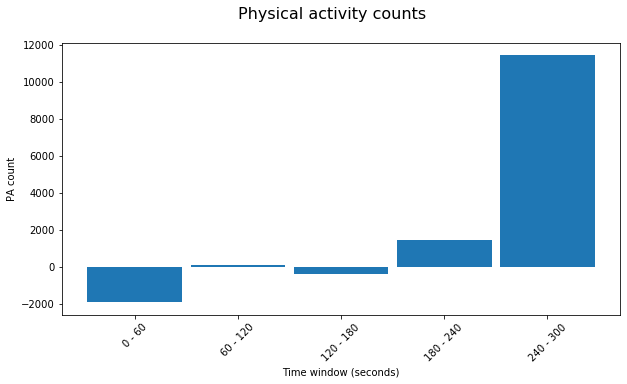

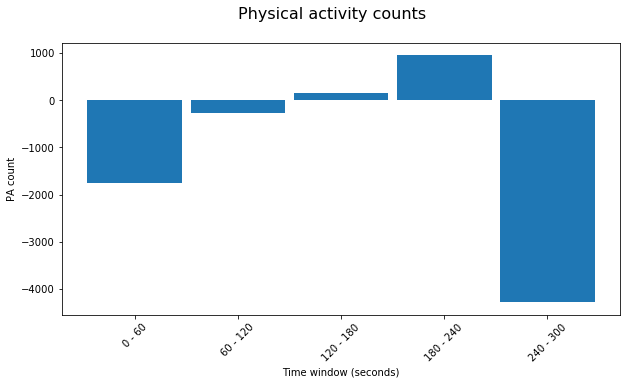

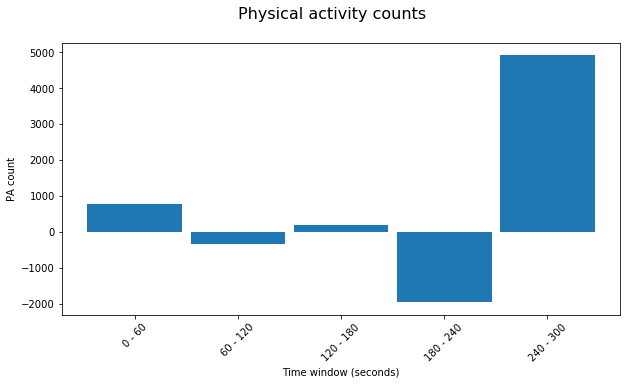

Cut-point set: butte_preschoolers (axis count: 3)...
sedentary: -inf to 819
light: 820 to 3907
moderate: 3908 to 6111
vigorous: 6112 to inf


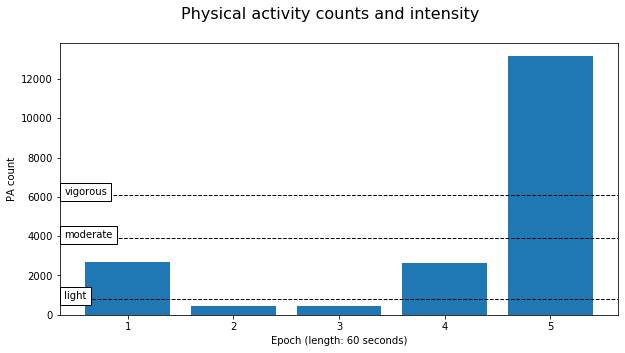

In [41]:
#x_counts = sm.pa.convert_counts(np.array(basic_dummy['x'][0:10000]), pd.to_numeric(basic_dummy['time'][0:10000]), time_scale='ms', epoch=60, rectify='full', integrate='simpson', plot=True)
#y_counts = sm.pa.convert_counts(np.array(basic_dummy['y'][0:10000]), pd.to_numeric(basic_dummy['time'][0:10000]), time_scale='ms', epoch=60, rectify='full', integrate='simpson', plot=True)
#z_counts = sm.pa.convert_counts(np.array(basic_dummy['z'][0:10000]), pd.to_numeric(basic_dummy['time'][0:10000]), time_scale='ms', epoch=60, rectify='full', integrate='simpson', plot=True)

#vm = sm.signal.vector_magnitude(x_counts, y_counts, z_counts)
#categories, time_spent = sm.pa.cut_points(vm, set_name='butte_preschoolers', n_axis=3, plot=True)

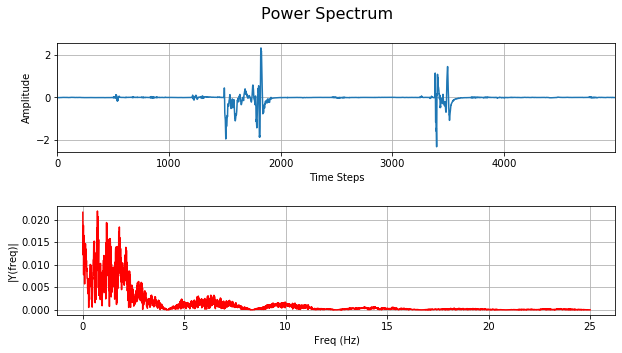

In [110]:
#real_fft_x = sm.signal.fft(basic_dummy['x_mean_quarter'].iloc[0:5000], sampling_rate, plot=True).real

In [3]:
def basic(df,pid):
    
    #general rolling std and mean
     
    quarter_sec = 12
    sec = 51
    short = sec*2
    full = sec*10
    
    df = df[df['pid'] == pid].copy()
    
    df['x_mean_quarter'] = df['x'].rolling(window=quarter_sec).mean()
    df['x_std_quarter'] = df['x'].rolling(window=quarter_sec).std()
    df['x_mean_short'] = df['x'].rolling(window=short).mean()
    df['x_std_short'] = df['x'].rolling(window=short).std()
    df['x_mean_long'] = df['x'].rolling(window=full).mean()
    df['x_std_long'] = df['x'].rolling(window=full).std()
    
    df['y_mean_quarter'] = df['y'].rolling(window=quarter_sec).mean()
    df['y_std_quarter'] = df['y'].rolling(window=quarter_sec).std()
    df['y_mean_short'] = df['y'].rolling(window=short).mean()
    df['y_std_short'] = df['y'].rolling(window=short).std()
    df['y_mean_long'] = df['y'].rolling(window=full).mean()
    df['y_std_long'] = df['y'].rolling(window=full).std()
                          
    df['z_mean_quarter'] = df['y'].rolling(window=quarter_sec).mean()
    df['z_std_quarter'] = df['y'].rolling(window=quarter_sec).std()
    df['z_mean_short'] = df['z'].rolling(window=short).mean()
    df['z_std_short'] = df['z'].rolling(window=short).std()
    df['z_mean_long'] = df['z'].rolling(window=full).mean()
    df['z_std_long'] = df['z'].rolling(window=full).std()
    
    df = df.reset_index().drop('index', axis = 1).dropna(axis = 0)
    
    return df

In [4]:
def getZeroCrossingRate(arr):
        my_array = np.array(arr)
        return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))

In [5]:
def gait_and_zero_cross(df, pid):
    
    #would ideally look at fft peaks, but peak detection will be wonky applied across all different behaviors/users/times
    #fft also asymmetric, noticeable imaginary components. could apply on smoothed/filtered data.
    #instead use gait extraction from https://github.com/sho-87/sensormotion/blob/master/tutorial.ipynb
    #zero crossing rate is intuitively useful, how much acc on axis changes sign
    
    sampling_rate = 40
    
    b, a = sm.signal.build_filter(10, sampling_rate, 'low', filter_order=4)

    
    sec = 51
    short = sec*2
    full = sec*10
    big = sec*500
    
    df = df[df['pid'] == pid].copy().reset_index().drop('index', axis = 1)
    
    windows = np.arange(0,len(df),big)
    
    #commented out last three sensormotion variables because division by zero was occurring
    #probably occured when no peaks detected

    df_app = pd.DataFrame()
    
    for i in range(len(windows)-1):
        
        small = df.iloc[windows[i]:windows[i+1]].copy()
        
        x_f = sm.signal.filter_signal(b, a, small['x_mean_quarter'])
        y_f = sm.signal.filter_signal(b, a, small['y_mean_quarter'])
        z_f = sm.signal.filter_signal(b, a, small['z_mean_quarter'])
        
        peak_times_x, peak_values_x = sm.peak.find_peaks(small['time'], x_f, peak_type='valley', min_val=0.6, min_dist=10, plot=False)

        step_count_x = sm.gait.step_count(peak_times_x)
        cadence_x = sm.gait.cadence(small['time'], peak_times_x)
        #step_time_x, step_time_sd_x, step_time_cov_x = sm.gait.step_time(peak_times_x)

        peak_times_y, peak_values_y = sm.peak.find_peaks(small['time'], y_f, peak_type='valley', min_val=0.6, min_dist=10, plot=False)

        step_count_y = sm.gait.step_count(peak_times_y)
        cadence_y = sm.gait.cadence(small['time'], peak_times_y)
        #step_time_y, step_time_sd_y, step_time_cov_y = sm.gait.step_time(peak_times_y)

        peak_times_z, peak_values_z = sm.peak.find_peaks(small['time'], z_f, peak_type='valley', min_val=0.6, min_dist=10, plot=False)

        step_count_z = sm.gait.step_count(peak_times_z)
        cadence_z = sm.gait.cadence(small['time'], peak_times_z)
        #step_time_z, step_time_sd_z, step_time_cov_z = sm.gait.step_time(peak_times_z)
        
        small['x_step_count'] = step_count_x
        small['x_cadence'] = cadence_x
        #small['x_step_time'] = step_time_x
        #small['x_step_time_sd'] = step_time_sd_x
        #small['x_step_time_cov'] = step_time_cov_x

        small['y_step_count'] = step_count_y
        small['y_cadence'] = cadence_y
        #small['y_step_time'] = step_time_y
        #small['y_step_time_sd'] = step_time_sd_y
        #small['y_step_time_cov'] = step_time_cov_y

        small['z_step_count'] = step_count_z
        small['z_cadence'] = cadence_z
        #small['z_step_time'] = step_time_z
        #small['z_step_time_sd'] = step_time_sd_z
        #small['z_step_time_cov'] = step_time_cov_z
        
        
        small['x_zcr'] = getZeroCrossingRate(np.array(small['x']))
        small['y_zcr'] = getZeroCrossingRate(np.array(small['y']))
        small['z_zcr'] = getZeroCrossingRate(np.array(small['z']))
        
        df_app = df_app.append(small)
        
    df = df_app.reset_index().drop('index', axis = 1)
    
    return df

In [6]:
def mfcc(df, pid):
    
    #give whole df, one pid at a time
    
    #could get covariance of mfccs but that means way more data

    df = df[df['pid'] == pid].copy().reset_index().drop('index', axis = 1)
    
    Fs = 40
    mfcc_x_array = librosa.feature.mfcc(np.array(df['x']), sr=Fs).T
    mfcc_y_array = librosa.feature.mfcc(np.array(df['y']), sr=Fs).T
    mfcc_z_array = librosa.feature.mfcc(np.array(df['z']), sr=Fs).T

    x_mfcc = pd.DataFrame(mfcc_x_array)
    y_mfcc = pd.DataFrame(mfcc_y_array)
    z_mfcc = pd.DataFrame(mfcc_z_array)

    expansion_x = round(len(df)/len(x_mfcc))
    new_index_x = (pd.DataFrame(x_mfcc).index * expansion_x)
    x_mfcc.index = new_index_x

    expansion_y = round(len(df)/len(y_mfcc))
    new_index_y = (pd.DataFrame(y_mfcc).index * expansion_y)
    y_mfcc.index = new_index_x

    expansion_z = round(len(df)/len(z_mfcc))
    new_index_z = (pd.DataFrame(z_mfcc).index * expansion_z)
    z_mfcc.index = new_index_z

    df = pd.merge_asof(df,x_mfcc, left_index = True, right_index = True)
    df = pd.merge_asof(df,y_mfcc, left_index = True, right_index = True)
    df = pd.merge_asof(df,z_mfcc, left_index = True, right_index = True)
    
    df = df.reset_index().drop('index', axis = 1)
 
    #new_names = [(i,i+'_z') for i in df.iloc[:, 6:].columns.values]
    #df.rename(columns = dict(new_names), inplace=True)

    return df

In [7]:
def rms(df,pid):
    
    #give whole df, one pid at a time
    
    #rms very useful for seeing just how much acceleration is occurring in a window
    
    df = df[df['pid'] == pid].copy()
    
    sec = 51
    short = sec*2
    sec5 = sec*5
    full = sec*10
    
    df['x_rms'] = (df['x']**2).rolling(window=short).mean()**.5
    df['y_rms'] = (df['y']**2).rolling(window=short).mean()**.5
    df['z_rms'] = (df['z']**2).rolling(window=short).mean()**.5
    
    df['x_rms_diff_sec'] = df['x_rms'].diff(periods = sec)
    df['y_rms_diff_sec'] = df['y_rms'].diff(periods = sec)
    df['z_rms_diff_sec'] = df['z_rms'].diff(periods = sec)
    
    df['x_rms_diff_sec5'] = df['x_rms'].diff(periods = sec5)
    df['y_rms_diff_sec5'] = df['y_rms'].diff(periods = sec5)
    df['z_rms_diff_sec5'] = df['z_rms'].diff(periods = sec5)
    
    df = df.reset_index().drop('index', axis = 1)
    
    return df

#### Choose one of the five methods below, then pickle.

In [10]:
#1

#apply each function (without extract or summarize) and take every 25 rows (~half second) for each user

start = datetime.now()

grab_every = pd.DataFrame()

for i in range(len(ids)):
    temp_grab = basic(df,ids[i])
    temp_grab = gait_and_zero_cross(temp_grab, ids[i])
    temp_grab = mfcc(temp_grab, ids[i])
    temp_grab = rms(temp_grab, ids[i])
    temp_grab = temp_grab.iloc[range(0,len(temp_grab),25)]
    grab_every = grab_every.append(temp_grab)

df = grab_every.dropna(axis = 0)
    
end = datetime.now()

end - start

datetime.timedelta(seconds=278, microseconds=273121)

In [11]:
df.head()

,time,pid,x,y,z,TAC_Reading,x_fft_1,x_fft_2,x_fft_3,y_fft_1,...,x_mean_long,x_std_long,y_mean_short,y_std_short,y_mean_long,y_std_long,z_mean_short,z_std_short,z_mean_long,z_std_long
525,1493739742587,JB3156,-0.006592,0.005908,0.008528,0.035549,5469.112931,-4486.878527,2775.130233,-21708.270315,...,-0.056394,0.184828,0.000558,0.020346,0.118906,0.665301,0.024413,0.012756,0.110147,0.302441
550,1493739743089,JB3156,-0.008537,-0.019438,0.001342,0.035549,5469.112931,-4486.878527,2775.130233,-21708.270315,...,-0.028135,0.025008,-0.000059,0.017398,0.017216,0.055145,0.023044,0.016047,0.076599,0.064116
575,1493739743593,JB3156,-0.008419,0.041303,0.000147,0.035549,5469.112931,-4486.878527,2775.130233,-21708.270315,...,-0.025369,0.024102,-0.000554,0.020511,0.007618,0.036192,0.016335,0.016577,0.073558,0.065936
600,1493739744100,JB3156,-0.008186,0.026511,-0.002250,0.035549,5469.112931,-4486.878527,2775.130233,-21708.270315,...,-0.024281,0.023368,-0.000320,0.022740,0.003794,0.027094,0.008562,0.014980,0.071013,0.067481
625,1493739744604,JB3156,0.026681,-0.003895,0.006128,0.035549,5469.112931,-4486.878527,2775.130233,-21708.270315,...,-0.023721,0.023702,0.000016,0.023791,0.001995,0.024722,0.003385,0.013997,0.069401,0.068787


In [8]:
#2

#apply each function (without extract or summarize) and take every 510 rows (~10 seconds) for each user

start = datetime.now()

grab_every = pd.DataFrame()

for i in range(len(ids)):
    temp_grab = basic(df,ids[i])
    temp_grab = gait_and_zero_cross(temp_grab, ids[i])
    temp_grab = mfcc(temp_grab, ids[i])
    temp_grab = rms(temp_grab, ids[i])

    temp_grab = temp_grab.iloc[range(0,len(temp_grab),510)]
    grab_every = grab_every.append(temp_grab)

df = grab_every.dropna(axis = 0)
    
end = datetime.now()

end - start

datetime.timedelta(seconds=475, microseconds=45344)

In [15]:
df.shape

(27237, 102)

In [16]:
df.head()

,time,pid,x,y,z,TAC_Reading,x_mean_quarter,x_std_quarter,x_mean_short,x_std_short,...,19,x_rms,y_rms,z_rms,x_rms_diff_sec,y_rms_diff_sec,z_rms_diff_sec,x_rms_diff_sec5,y_rms_diff_sec5,z_rms_diff_sec5
510,1493739762980,JB3156,-0.011525,0.018229,0.070762,0.035549,0.009078,0.166438,-0.004583,0.058050,...,0.0,0.057947,0.115681,0.172775,0.045034,0.096801,-0.024223,0.045263,0.091900,0.145806
1020,1493739773273,JB3156,-0.005118,-0.018548,0.012102,0.035549,0.001350,0.010473,0.001374,0.017303,...,0.0,0.017272,0.037904,0.020506,-0.018662,-0.011699,-0.001655,-0.019866,-0.000343,-0.002110
1530,1493739798401,JB3156,-0.673134,-0.066162,0.577447,0.035549,-0.407728,0.381635,-0.328825,1.019683,...,0.0,1.066624,0.719761,1.440713,1.035670,0.680364,1.417503,0.883021,0.454158,1.404084
2040,1493739808679,JB3156,-0.001336,-0.005891,0.006237,0.035549,-0.002835,0.010219,-0.008388,0.013924,...,0.0,0.016197,0.016845,0.032893,-0.144370,-0.038053,-0.753174,-0.950158,-0.384397,-1.345767
2550,1493739819129,JB3156,-0.030430,0.005756,0.048074,0.035549,-0.006629,0.043855,-0.002878,0.062654,...,0.0,0.062412,0.102064,0.035179,0.026773,0.070221,0.008688,0.048213,0.078608,-0.067075


In [8]:
#3

#apply each function (without extract or summarize) and collapse to mean for every 25 rows (~half second) for each user

start = datetime.now()

grab_every = pd.DataFrame()

for i in range(len(ids)):
    temp_grab = basic(df,ids[i])
    temp_grab = gait_and_zero_cross(temp_grab, ids[i])
    temp_grab = mfcc(temp_grab, ids[i])
    temp_grab = rms(temp_grab, ids[i])
    sep = temp_grab
    temp_grab = temp_grab.rolling(window=25).mean()
    temp_grab[['time','pid']] = sep[['time','pid']]
    temp_grab = temp_grab.iloc[range(0,len(temp_grab),25)]
    grab_every = grab_every.append(temp_grab)

df = grab_every.dropna(axis = 0)
    
end = datetime.now()

end - start

datetime.timedelta(seconds=597, microseconds=312126)

In [ ]:
#4

#apply each function (without extract or summarize) and collapse to mean for every 510 rows (~10 seconds) for each user

start = datetime.now()

grab_every = pd.DataFrame()

for i in range(len(ids)):
    temp_grab = basic(df,ids[i])
    temp_grab = gait_and_zero_cross(temp_grab, ids[i])
    temp_grab = mfcc(temp_grab, ids[i])
    temp_grab = rms(temp_grab, ids[i])
    sep = temp_grab
    temp_grab = temp_grab.rolling(window=510).mean()
    temp_grab[['time','pid']] = sep[['time','pid']]
    temp_grab = temp_grab.iloc[range(0,len(temp_grab),510)]
    grab_every = grab_every.append(temp_grab)

df = grab_every.dropna(axis = 0)
    
end = datetime.now()

end - start

In [ ]:
#5

#apply each function (without extract or summarize) and keep all rows

start = datetime.now()

# ~298 seconds
basic_df = pd.DataFrame(columns = (basic(df, ids[0])).columns)

for i in range(len(ids)):
    basic_df = basic_df.append(basic(df,ids[i]))
    
df = basic_df

print('completed rolling means and stds')

# ~66 seconds
fz_df = pd.DataFrame(columns = (gait_and_zero_cross(df, ids[0])).columns)

for i in range(len(ids)):
    fz_df = fz_df.append(gait_and_zero_cross(df,ids[i]))
    
df = fz_df

print('completed fft and zero cross')

# ~90 seconds
mfcc_df = pd.DataFrame(columns = (mfcc(df, ids[0])).columns)

for i in range(len(ids)):
    mfcc_df = mfcc_df.append(mfcc(df,ids[i]))
    
df = mfcc_df

print('completed mfcc')

# ~156 seconds
rms_df = pd.DataFrame(columns = (rms(df, ids[0])).columns)

for i in range(len(ids)):
    rms_df = rms_df.append(rms(df,ids[i]))
    
df = rms_df

print('completed rms')

df = df.dropna(axis = 0)

end = datetime.now()

end - start

In [14]:
#uncollapsed is ~8 gigs
#half second version is ~440 megs

start = datetime.now()

df.to_pickle('./processed.pkl')

end = datetime.now()

end - start

datetime.timedelta(seconds=1, microseconds=47993)